<a id=0></a>
# 9.Regression Models
※　代表的な回帰分析モデルの紹介  
※　モデルの評価、交差検証、パラメータのグリッドサーチ

---
### [1. 探索的データ分析（EDA）](#1)
### [2. LinearRegression](#2)
### [3. RandomForestRegressor](#3)
### [4. KNeighborsRegressor](#4)
### [5. モデルの評価](#5)
### [6. クロスバリデーションとグリッドサーチ](#6)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid')
import japanize_matplotlib

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA）¶

* 糖尿病のデータセット
* 分布の確認
* 相関関係
* トレインデータ、テストデータ

糖尿病のデータセット

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
X, y = load_diabetes(return_X_y=True)

In [6]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [7]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [8]:
X.shape, y.shape

((442, 10), (442,))

In [9]:
# y.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((442, 10), (442, 1))

In [10]:
Xy = np.concatenate([X, y], axis=1)
Xy[:5]

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02,
         2.18723855e-02, -4.42234984e-02, -3.48207628e-02,
        -4.34008457e-02, -2.59226200e-03,  1.99074862e-02,
        -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02,
        -2.63275281e-02, -8.44872411e-03, -1.91633397e-02,
         7.44115641e-02, -3.94933829e-02, -6.83315471e-02,
        -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02,
        -5.67042229e-03, -4.55994513e-02, -3.41944659e-02,
        -3.23559322e-02, -2.59226200e-03,  2.86130929e-03,
        -2.59303390e-02,  1.41000000e+02],
       [-8.90629394e-02, -4.46416365e-02, -1.15950145e-02,
        -3.66560811e-02,  1.21905688e-02,  2.49905934e-02,
        -3.60375700e-02,  3.43088589e-02,  2.26877450e-02,
        -9.36191133e-03,  2.06000000e+02],
       [ 5.38306037e-03, -4.46416365e-02, -3.63846922e-02,
         2.18723855e-02,  3.93485161e-03,  1.55961395e-02,
  

In [11]:
Xy.shape

(442, 11)

In [12]:
# diabetes.feature_names + ['target']

In [13]:
df = pd.DataFrame(Xy, columns=diabetes.feature_names+['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [16]:
df['sex'].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

分布の確認

In [24]:
def plot_data(feature):
	fig, axes = plt.subplots(1, 3, figsize=(16, 5), tight_layout=True)
	sns.kdeplot(data=df, x=feature, hue='sex', fill=True, palette='Set1', ax=axes[0])
	axes[0].legend([], frameon=False)
	sns.boxplot(data=df, x='sex', y=feature, width=0.5, palette='Set1', ax=axes[1])
	axes[1].set_xticklabels([])
	sns.scatterplot(data=df, x=feature, y=y.flatten(), hue='sex', palette='Set1', ax=axes[2])
	axes[2].legend([], frameon=False)
	plt.suptitle(feature)
	plt.show()

In [20]:
import warnings
warnings.filterwarnings('ignore')

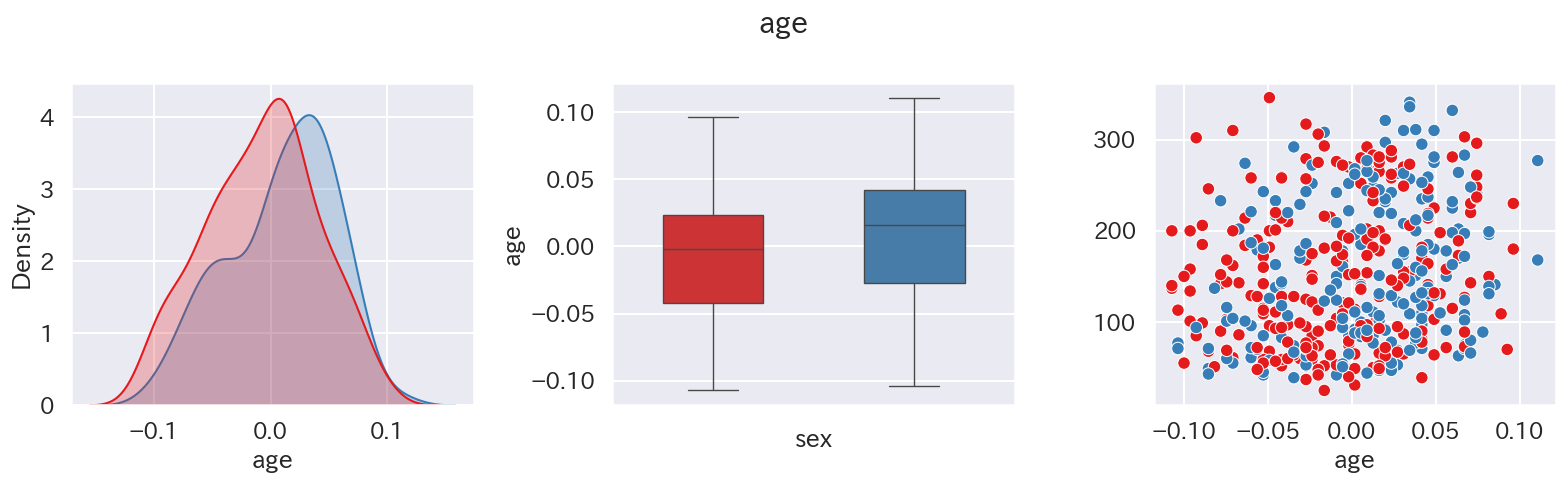

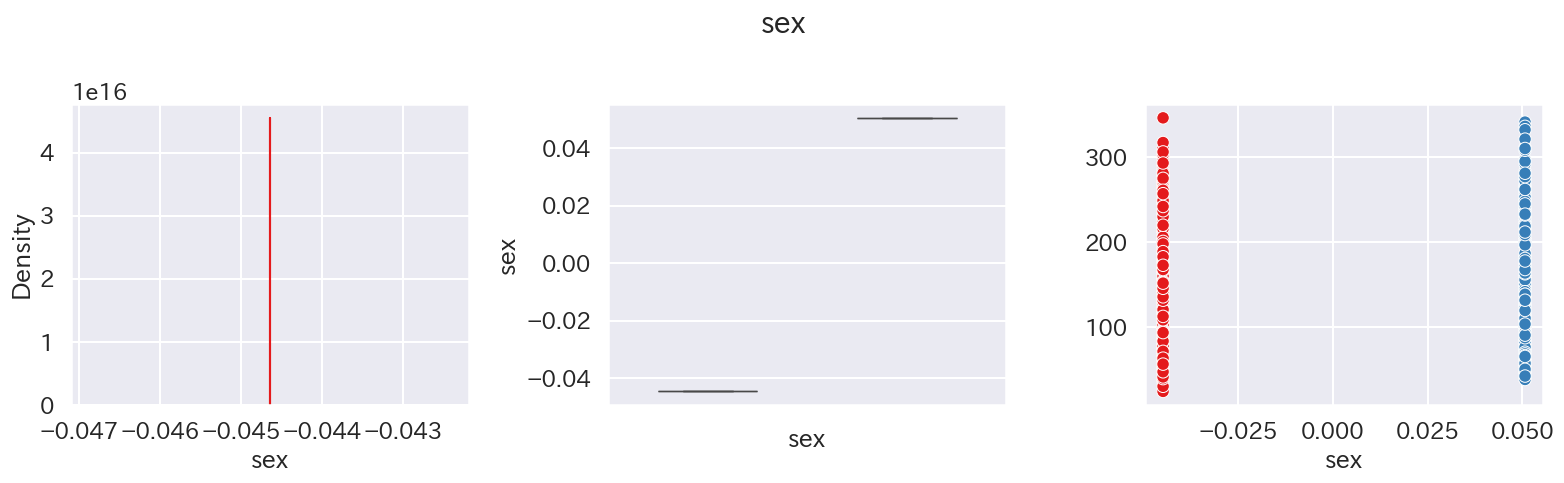

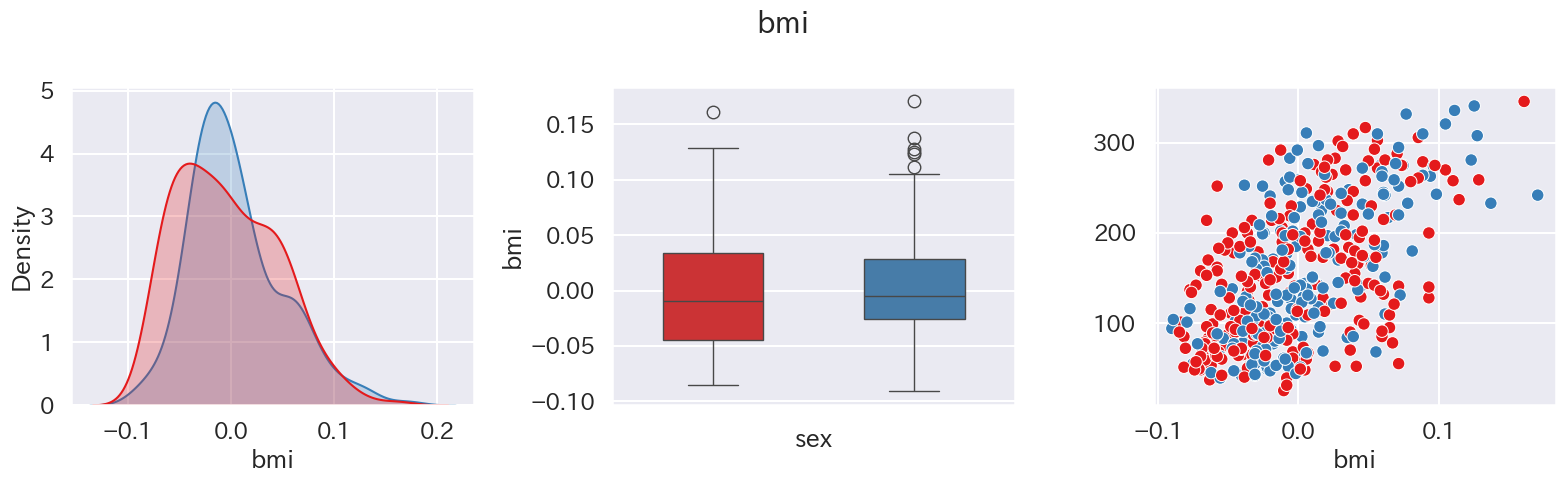

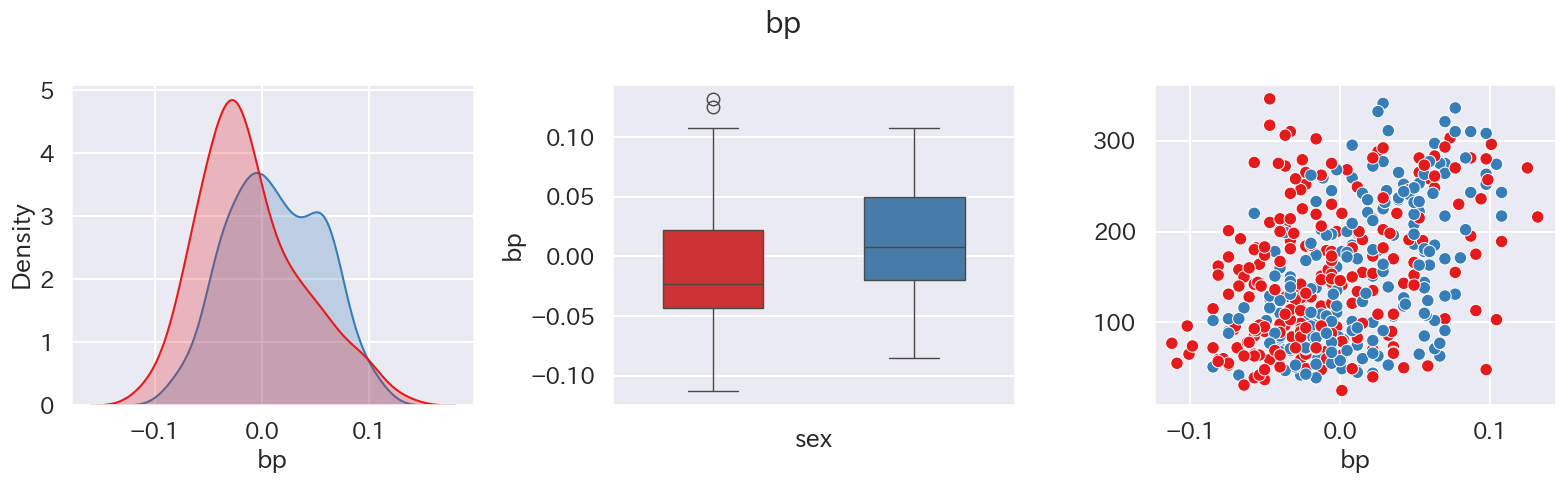

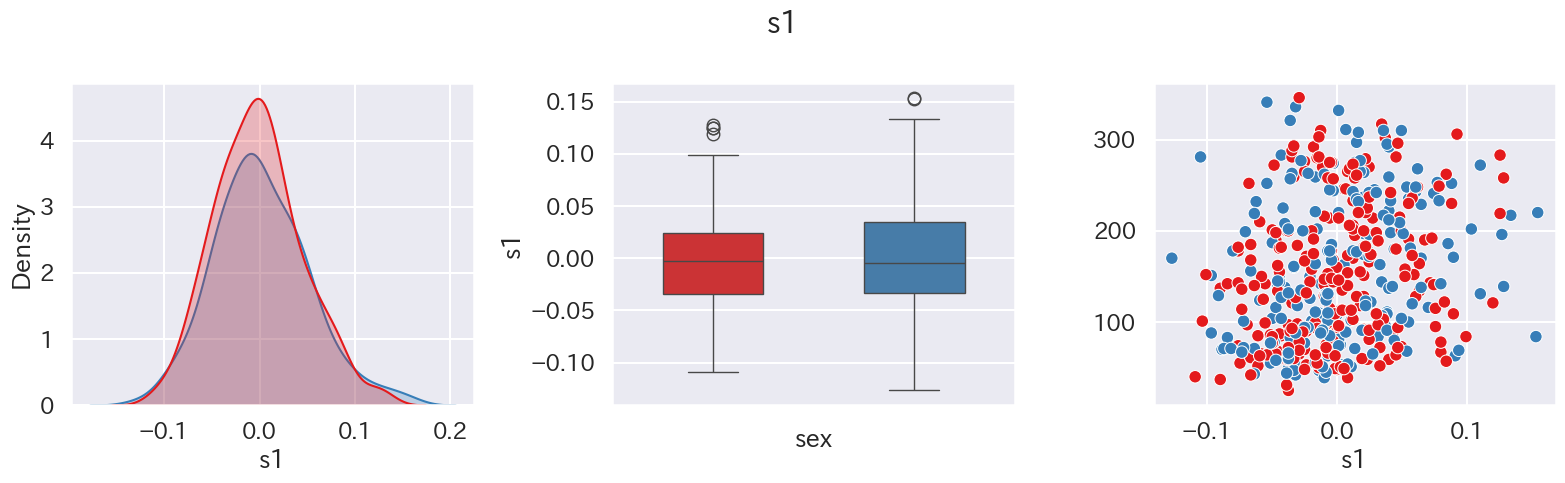

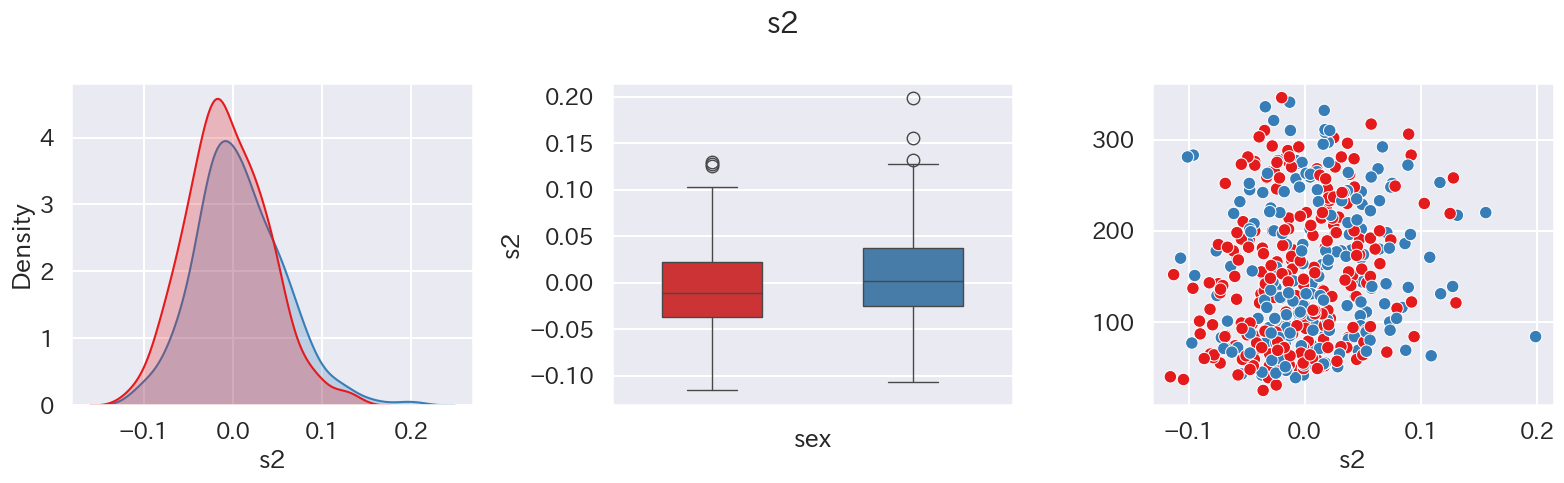

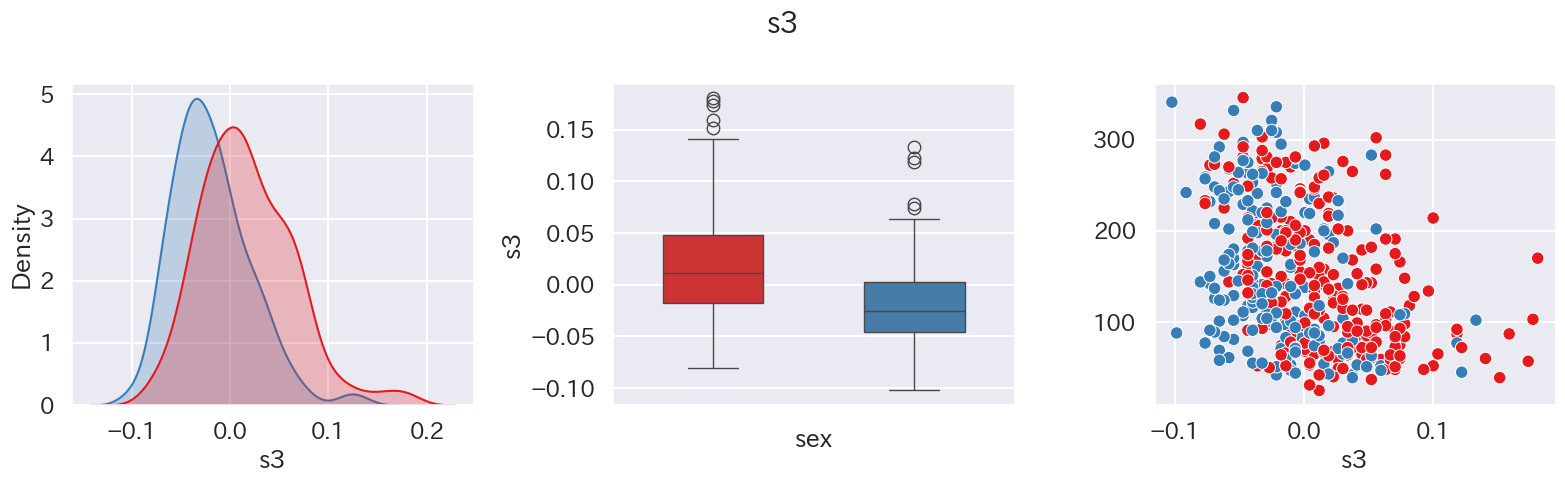

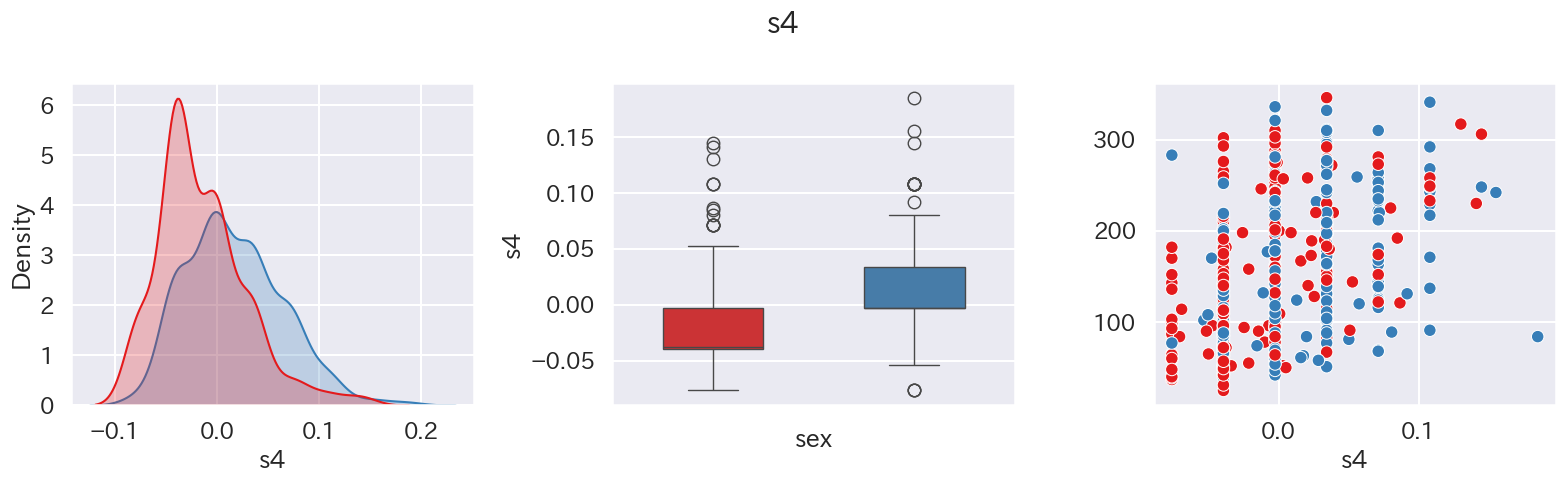

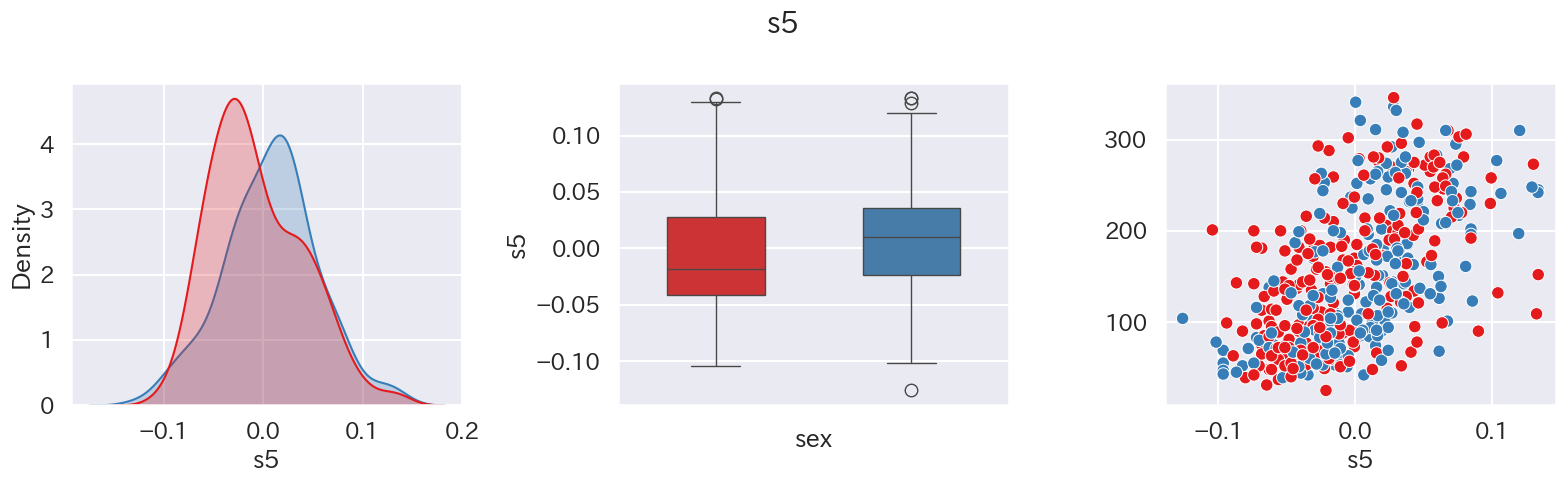

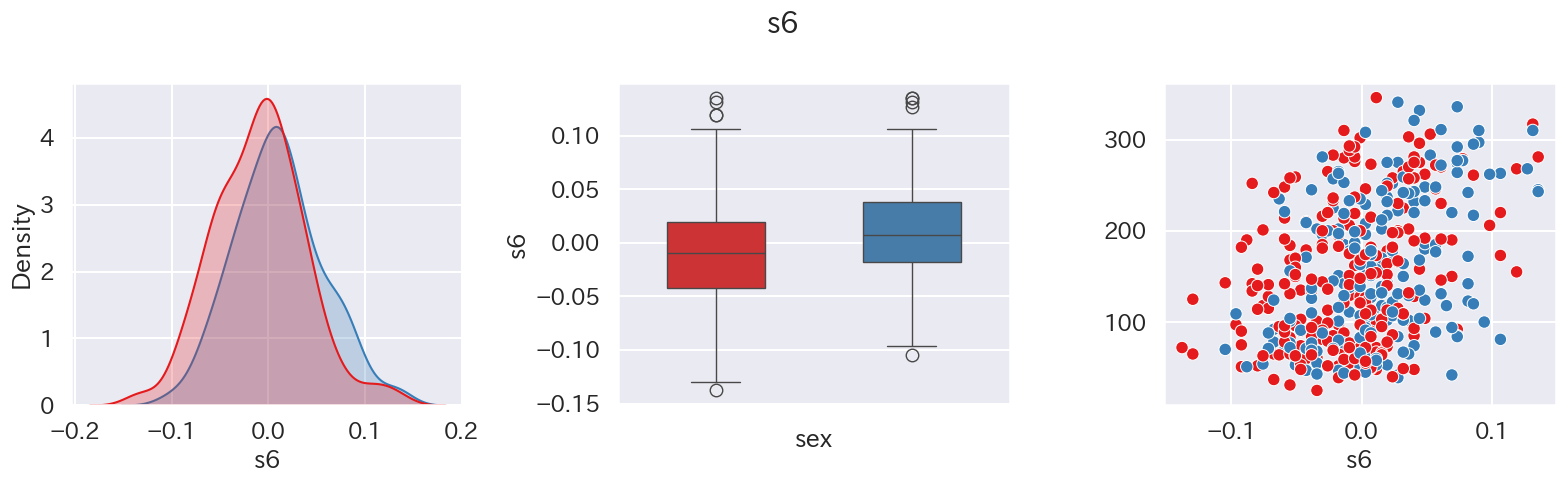

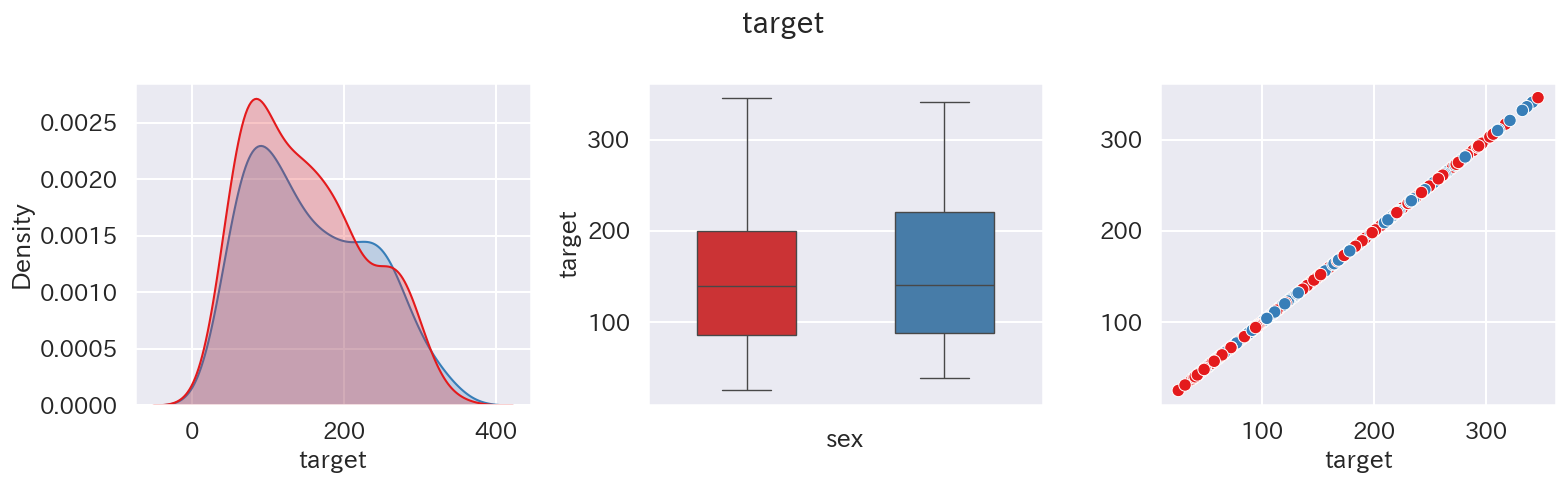

In [25]:
for feature in df.columns:
	plot_data(feature)

相関関係

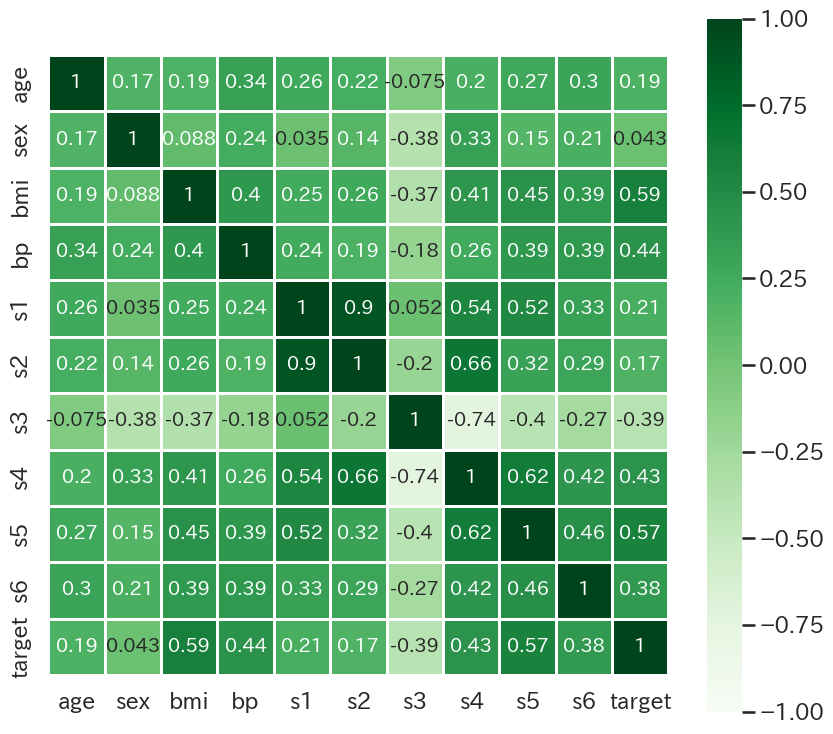

In [26]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 14}, cmap='Greens', square=True, linewidths=1, vmin=-1, vmax=1, center=0)
plt.show()

性別で分けてみる

In [27]:
df_s0 = df[df['sex']>0].drop(columns=['sex'], axis=0)
df_s1 = df[df['sex']<0].drop(columns=['sex'], axis=0)

In [28]:
df_s0.shape

(207, 10)

In [29]:
df_s1.shape

(235, 10)

トレインデータ、テストデータ

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, shuffle=True)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309, 1), (133, 1))

In [33]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df_s0.iloc[:, :-1], df_s0.iloc[:, -1], test_size=0.3, random_state=17)

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_s1.iloc[:, :-1], df_s1.iloc[:, -1], test_size=0.3, random_state=17)

---
<a id=2></a>
[Topへ](#0)

---
## 2. LinearRegression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* モデルの構築・予測・属性
* 実測値と予測値の比較
* スコア
* 性別ごとのデータで試してみる
---

モデルのインポート

In [35]:
from sklearn.linear_model import LinearRegression

モデルインスタンスの作成

In [36]:
lr_model = LinearRegression()

モデルの構築・予測・属性

In [37]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [39]:
lr_pred = lr_model.predict(X_test)
lr_pred[:5]

array([[177.43299832],
       [235.00503399],
       [ 95.42904239],
       [100.93741348],
       [100.65578177]])

In [40]:
lr_model.coef_

array([[  31.55537643, -366.71859113,  490.82617701,  305.01986056,
         -12.9629019 , -211.37683435, -221.56778356,  219.12712275,
         497.68549475,   62.88281073]])

In [41]:
lr_model.intercept_

array([151.99058066])

In [47]:
X_test[0]

array([ 0.07076875, -0.04464164,  0.01211685,  0.04252949,  0.07135654,
        0.0534871 ,  0.05232174, -0.00259226,  0.02539508, -0.0052198 ])

In [51]:
y_test[0]

array([143.])

In [48]:
test = np.array([ 0.07076875, -0.04464164, 0.01211685, 0.04252958, 0.07135654, 0.0534871 , 0.05232174, -0.00259226,  0.02539313, -0.0052198 ]).reshape(1, -1)
test


array([[ 0.07076875, -0.04464164,  0.01211685,  0.04252958,  0.07135654,
         0.0534871 ,  0.05232174, -0.00259226,  0.02539313, -0.0052198 ]])

In [49]:
pred_0 = lr_model.predict(test)
pred_0

array([[177.43205689]])

In [50]:
pred_1 = np.dot(test, lr_model.coef_.T) + lr_model.intercept_
pred_1

array([[177.43205689]])

実測値と予測値の比較

In [56]:
df_result = pd.DataFrame()
df_result['true_value'] = y_test.flatten()
df_result['prediction'] = lr_pred.flatten()
df_result['residual'] = (y_test - lr_pred).flatten()
df_result.head()

,true_value,prediction,residual
0,143.0,177.432998,-34.432998
1,192.0,235.005034,-43.005034
2,108.0,95.429042,12.570958
3,129.0,100.937413,28.062587
4,170.0,100.655782,69.344218


In [62]:
df_result.sort_values('true_value', inplace=True)
df_result['true_value'].describe()

count    133.000000
mean     155.571429
std       75.719607
min       48.000000
25%       88.000000
50%      143.000000
75%      221.000000
max      306.000000
Name: true_value, dtype: float64

In [63]:
df_result

,true_value,prediction,residual
36,48.0,54.407300,-6.407300
45,48.0,79.047690,-31.047690
101,49.0,101.591438,-52.591438
118,50.0,146.959780,-96.959780
40,51.0,81.807181,-30.807181
...,...,...,...
16,283.0,177.133768,105.866232
37,288.0,211.304120,76.695880
39,297.0,202.664201,94.335799
72,303.0,275.580879,27.419121


In [65]:
df_result.reset_index(inplace=True)
df_result.head()

,level_0,index,true_value,prediction,residual
0,0,36,48.0,54.407300,-6.407300
1,1,45,48.0,79.047690,-31.047690
2,2,101,49.0,101.591438,-52.591438
3,3,118,50.0,146.959780,-96.959780
4,4,40,51.0,81.807181,-30.807181


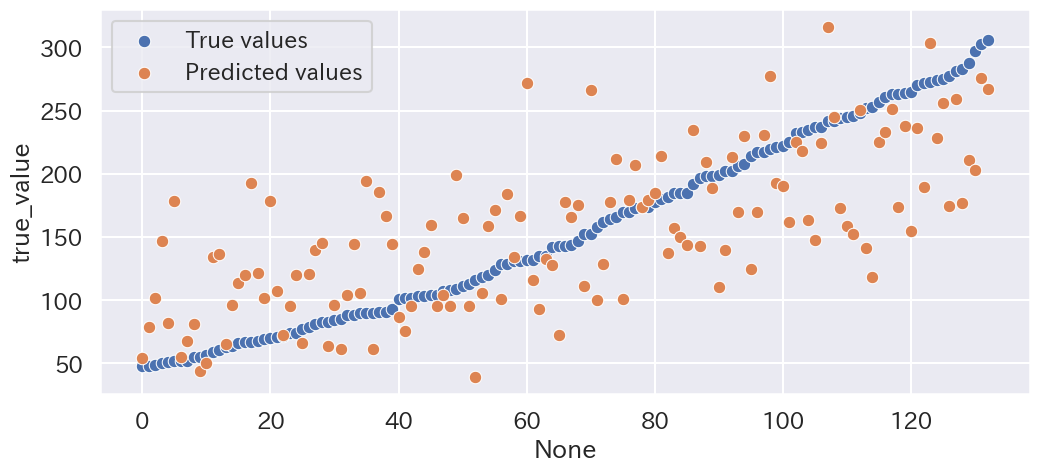

In [68]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_result, x=df_result.index, y='true_value', label='True values')
sns.scatterplot(data=df_result, x=df_result.index, y='prediction', label='Predicted values')
plt.legend();

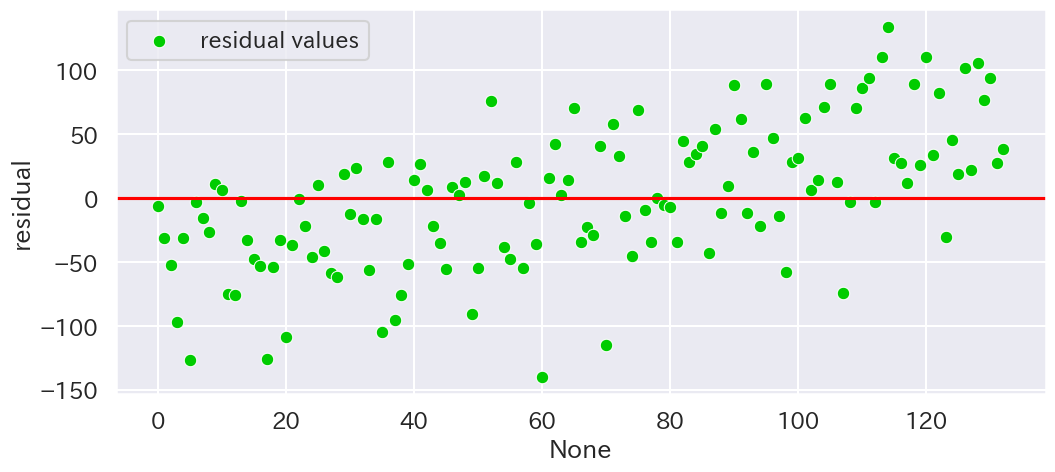

In [71]:
plt.figure(figsize=(12, 5))
# sns.scatterplot(data=df_result, x=df_result.index, y='true_value', label='True values')
sns.scatterplot(data=df_result, x=df_result.index, y='residual', color='#0c0', label='residual values')
plt.axhline(0, color='#f00')
plt.legend();

スコア

In [72]:
lr_model.score(X_test, y_test), lr_model.score(X_train, y_train)

(0.4653088132347172, 0.5213195909524871)

性別ごとのデータで試してみる

In [73]:
lr_model_s0 = LinearRegression()
lr_model_s0.fit(X0_train, y0_train)
lr_model_s0.score(X0_test, y0_test), lr_model_s0.score(X0_train, y0_train)

(0.5472026714756058, 0.5955480185654833)

In [74]:
lr_model_s1 = LinearRegression()
lr_model_s1.fit(X1_train, y1_train)
lr_model_s1.score(X1_test, y1_test), lr_model_s1.score(X1_train, y1_train)

(0.521026773680421, 0.4558535970823838)

---
<a id=3></a>
[Topへ](#0)

---
## 3. RandomForestRegressor

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* パラメータを変更してみる
* Treeの可視化
---

モデルのインポート

In [75]:
from sklearn.ensemble import RandomForestRegressor

モデルインスタンスの作成

In [76]:
rf_model =	RandomForestRegressor(
			n_estimators=100,
			max_depth=None,
			min_samples_split=2,
			min_samples_leaf=1,
			max_features=1.0,
			bootstrap=True,
			random_state=17,
			max_samples=None,
		)

モデルの構築・属性・予測・スコア

In [77]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [79]:
rf_pred = rf_model.predict(X_test)
rf_pred[:5]

array([177.29, 221.03,  95.38, 127.42, 111.14])

In [86]:
rf_model.estimator_

DecisionTreeRegressor()

In [87]:
rf_model.feature_importances_

array([0.06286879, 0.02094875, 0.23385147, 0.08764819, 0.04107012,
       0.05116433, 0.05610629, 0.02369583, 0.34937982, 0.07326641])

In [88]:
rf_model.score(X_test, y_test)

0.49161172426003963

In [89]:
rf_model.score(X_train, y_train)

0.9198706580063137

パラメータを変更してみる

In [90]:
rf_model_new =	RandomForestRegressor(
			n_estimators=120,
			max_depth=4,
			min_samples_split=5,
			min_samples_leaf=1,
			max_features=0.6,
			bootstrap=True,
			random_state=17,
			max_samples=0.7,
		)

In [94]:
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
rf_pred_new[:5]

array([176.37411581, 219.15230835,  98.60710126, 110.40610849,
       106.5296587 ])

In [95]:
rf_model_new.score(X_test, y_test), rf_model_new.score(X_train, y_train)

(0.5116264791328704, 0.6376734717657231)

Treeの可視化

In [96]:
from sklearn.tree import plot_tree

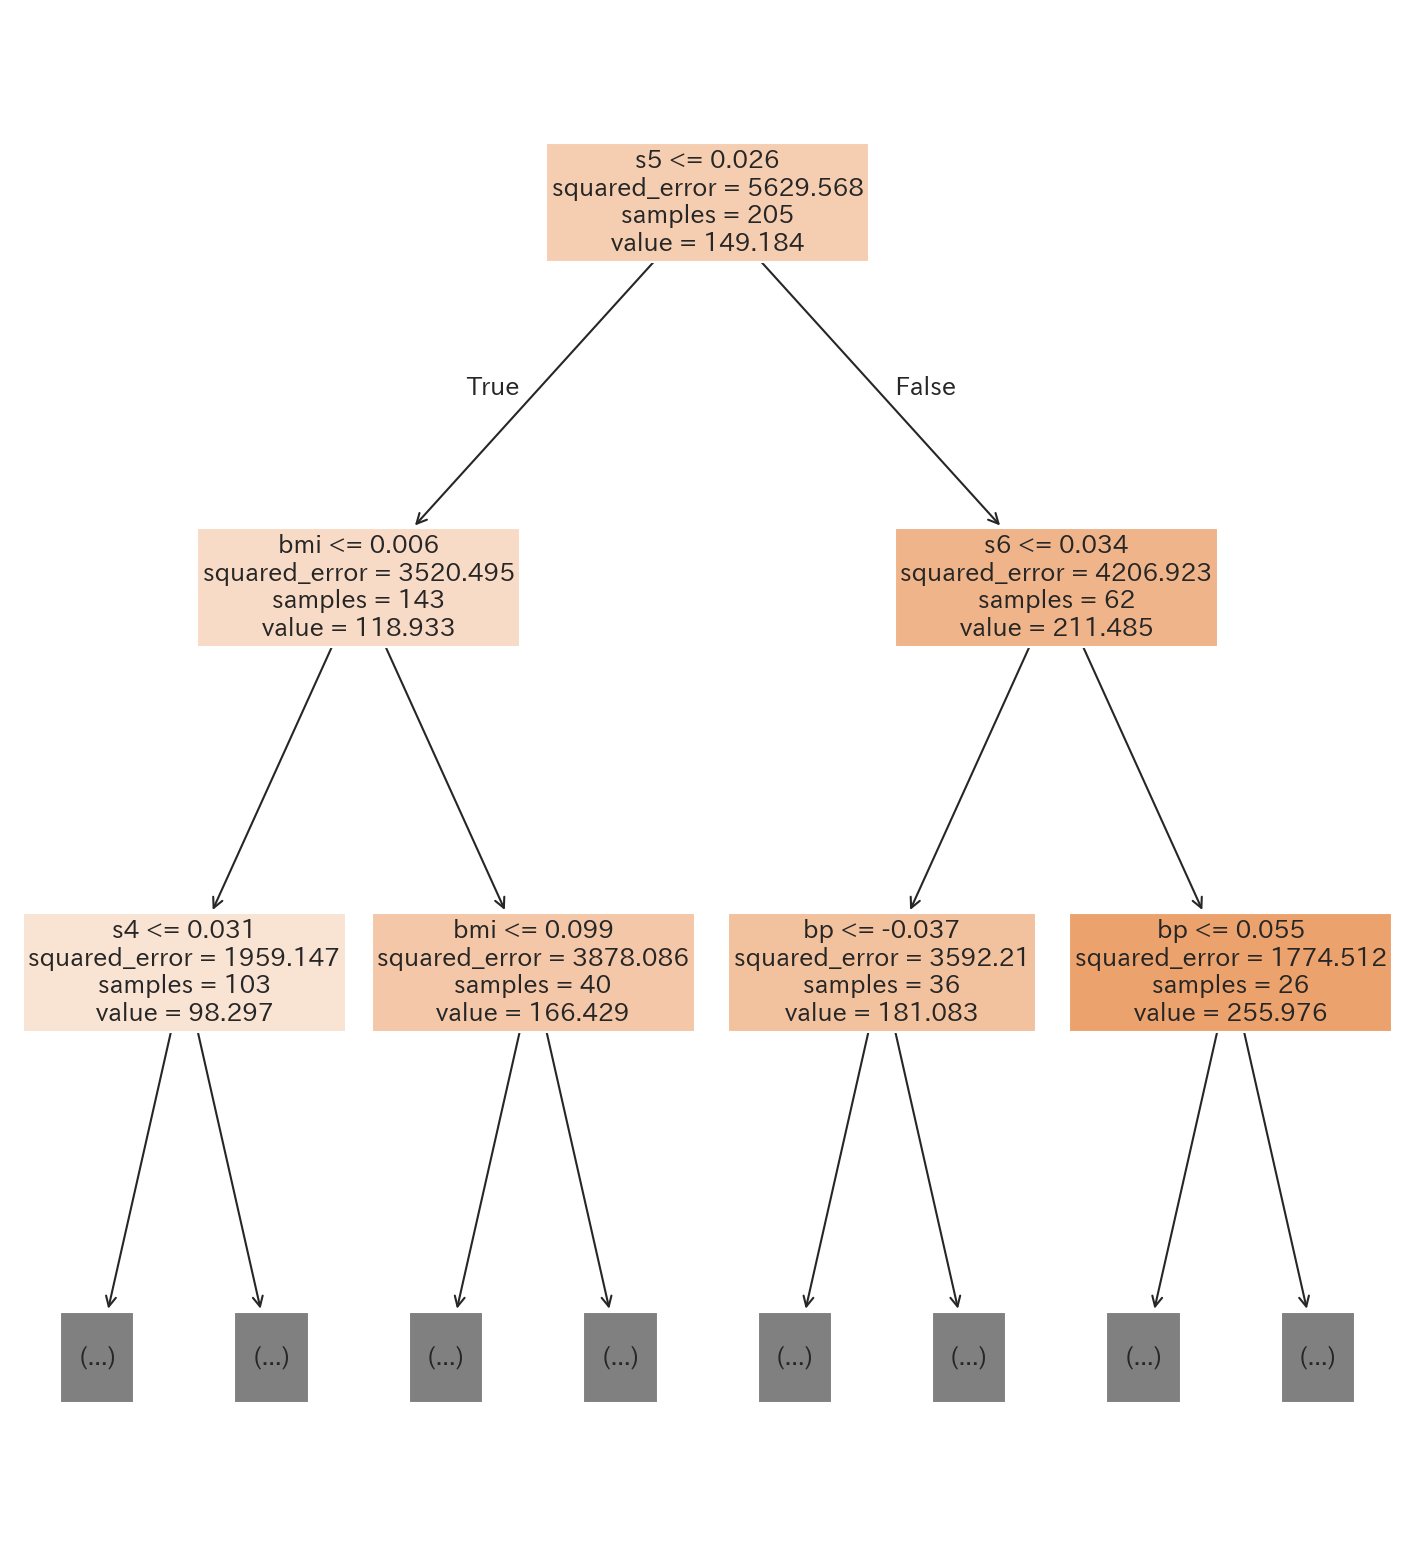

In [104]:
plt.figure(figsize=(18, 20))
plot_tree(rf_model.estimators_[0], max_depth=2, fontsize=18, feature_names=diabetes['feature_names'], filled=True);

---
<a id=4></a>
[Topへ](#0)

---
## 4. KNeighborsRegressor

* モデルのインポート  
     https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  
* モデルインスタンスの作成・スコア
* パラメータを変更してみる
---

モデルのインポート

In [105]:
from sklearn.neighbors import KNeighborsRegressor

モデルインスタンスの作成・スコア

In [156]:
kn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [157]:
kn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [158]:
kn_pred = kn_model.predict(X_test)
kn_pred[:5]

array([[161.4],
       [186.6],
       [100.4],
       [125. ],
       [120.2]])

In [159]:
kn_model.score(X_test, y_test), kn_model.score(X_train, y_train)

(0.39363769594293097, 0.5679093128613815)

パラメータを変更してみる

In [160]:
kn_model_new = KNeighborsRegressor(n_neighbors=13, weights='uniform')

In [161]:
kn_model_new.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [162]:
kn_model_new.score(X_test, y_test), kn_model_new.score(X_train, y_train)

(0.48222372829097404, 0.531737640595644)

---
<a id=5></a>
[Topへ](#0)

---
## 5. モデルの評価方法

* 評価指標
* モデルを評価する
* R2スコア(決定係数)とは
---

評価指標  
絶対平均誤差　/　二乗平均誤差　/　絶対パーセント誤差　/　R二乗値（決定係数）

Mean Absoulute Error(MAE, 絶対平均誤差)

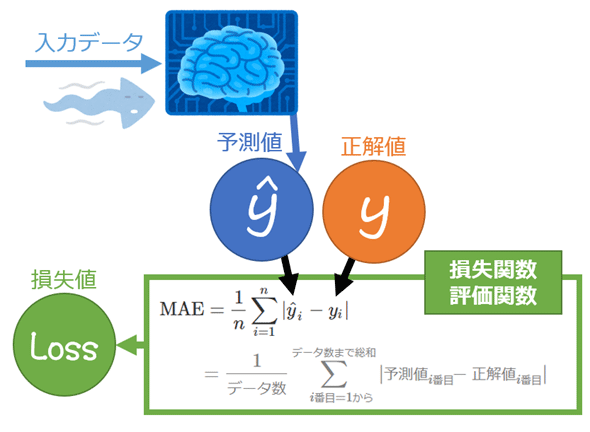

平均絶対パーセント誤差（MAPE：Mean Absolute Percentage Error）

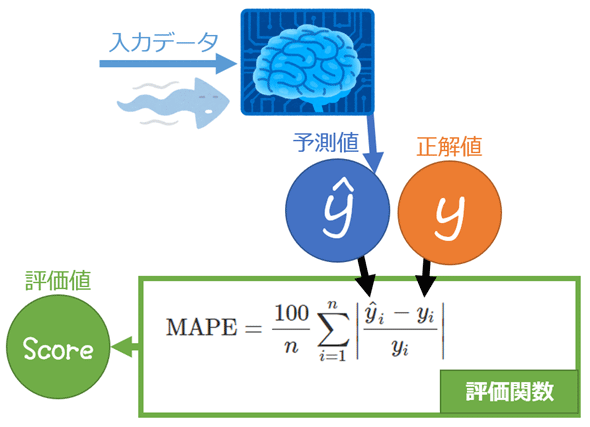

平均二乗誤差（MSE：Mean Squared Error）

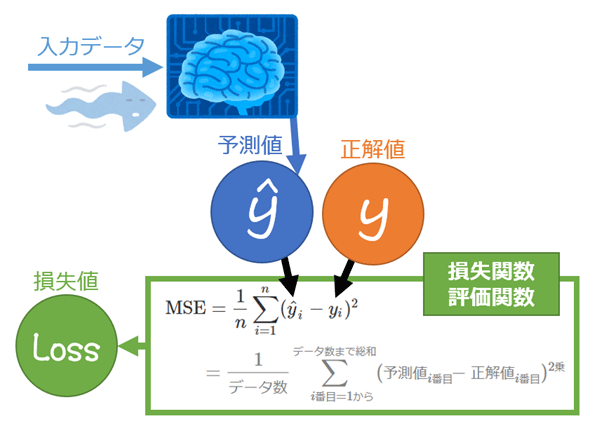

RMSE（Root MSE：MSEの平方根）

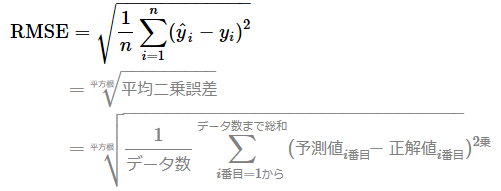

決定係数（Coefficient of Determination、寄与率）のR2（R squared）

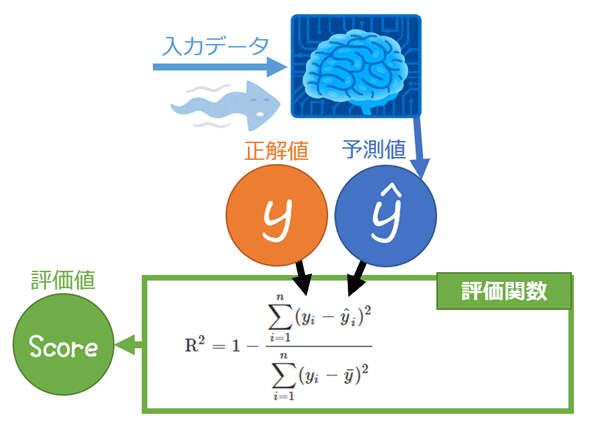

In [163]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

モデルを評価する  

In [175]:
def eval_models(models, X_train, y_train, X_test, y_test):
	for model in models:
		model.fit(X_train, y_train)
		pred = np.round(model.predict(X_test), 4)
		score = np.round(model.score(X_test, y_test), 4)
		mae = np.round(mean_absolute_error(y_test, pred), 4)
		mse = np.round(mean_squared_error(y_test, pred), 4)
		mape = np.round(mean_absolute_percentage_error(y_test, pred), 4)
		r2 = np.round(r2_score(y_test, pred), 4)
		print(f'{model}')
		print(f'Score : {score}, MAE : {mae}, MSE : {mse}, MAPE : {mape}, R^2 : {r2}')
		print('============================================================================')


In [176]:
models = [lr_model, rf_model_new, kn_model_new]
eval_models(models, X_train, y_train, X_test, y_test)

LinearRegression()
Score : 0.4653, MAE : 43.8217, MSE : 3042.5798, MAPE : 0.3629, R^2 : 0.4653
RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)
Score : 0.5116, MAE : 43.3375, MSE : 2779.0162, MAPE : 0.3645, R^2 : 0.5116
KNeighborsRegressor(n_neighbors=13)
Score : 0.4822, MAE : 44.1972, MSE : 2946.328, MAPE : 0.3679, R^2 : 0.4822


R2スコア(決定係数)とは

* R2 = 1 - Σ{( true_value(i) - pred(i) ) ** 2} / Σ{( true_value(i) - true_value_mean ) ** 2}
* 1に近いほど回帰式の精度が高い
* もし、すべてを「平均」で予想した場合(最も安易な？予想)　=> R2 = 0
* 0.5以上：予測精度がそれなりに高いと言える
* 0.7以上：予測精度が高い
* 0.9以上：精度が非常に高い。ただし、過学習でないかの検討も必要  
※　絶対的な基準は存在しません。あくまでも目安として用いる指標です

---
<a id=6></a>
[Topへ](#0)

---
## 6. クロスバリデーションとグリッドサーチ

* KFold  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* cross_val_score  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* GridSearchCV  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
---

KFold

In [178]:
from sklearn.model_selection import KFold, cross_val_score

In [179]:
k = KFold(5, shuffle=True, random_state=17)

In [182]:
set_1, set_2, set_3, set_4, set_5 = k.split(X)
set_1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  15,  17,  18,  19,  21,  22,  23,  24,  26,  27,  28,  30,
         31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  43,  44,  45,
         46,  47,  48,  49,  50,  53,  54,  55,  56,  57,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  72,  73,  74,  75,  76,
         77,  78,  79,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  96,  97,  98, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 110, 111, 114, 115, 116, 117, 118, 119, 120, 121, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 135, 137, 138, 139, 140,
        141, 143, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174,
        175, 176, 177, 178, 179, 180, 182, 184, 185, 186, 188, 190, 191,
        192, 193, 194, 195, 196, 198, 201, 202, 203, 204, 205, 206, 208,
        209, 210, 212, 213, 214, 216, 217, 218, 220

In [184]:
len(set_1[0]), len(set_1[1])

(353, 89)

In [185]:
len(set_2[0]), len(set_2[1])

(353, 89)

In [188]:
len(set_1[1])/len(X)

0.20135746606334842

cross_val_score

In [197]:
for model in models:
	avg_scores = np.round(cross_val_score(model, X, y, cv=k).mean(), 4)
	print(f'{model}')
	print(f'{avg_scores=}')
	print(f'=============================================================================')

LinearRegression()
avg_scores=0.4812
RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)
avg_scores=0.4499
KNeighborsRegressor(n_neighbors=13)
avg_scores=0.4463


GridSearchCV

In [198]:
from sklearn.model_selection import GridSearchCV

In [208]:
# rf_modelのパラメータを変更する
# max_depth=4, min_samples_split=5, max_features=0.6, max_samples=0.7
params = {
    'max_depth':list(range(2,11)),
    'max_features':list(np.linspace(0.4, 0.9, 6)),
    'max_samples':list(np.linspace(0.4, 0.9, 6)),
    'min_samples_split':[3, 6]
}
# 計２４の組み合わせで結果を取得できる

In [209]:
grid = GridSearchCV(rf_model, param_grid=params, cv=k)

In [210]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(random_state=17),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [0.4, 0.5, 0.6000000000000001,
                                          0.7000000000000001, 0.8, 0.9],
                         'max_samples': [0.4, 0.5, 0.6000000000000001,
                                         0.7000000000000001, 0.8, 0.9],
                         'min_samples_split': [3, 6]})

In [214]:
pd.DataFrame(grid.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.238618,0.099924,0.008636,0.002229,2,0.4,0.4,3,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.435702,0.457775,0.407862,0.411450,0.406103,0.423778,0.020078,637
1,0.183782,0.043637,0.008362,0.004070,2,0.4,0.4,6,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.435702,0.457775,0.407862,0.411450,0.406103,0.423778,0.020078,637
2,0.134656,0.001477,0.006254,0.001050,2,0.4,0.5,3,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.441335,0.462570,0.397433,0.416401,0.399985,0.423545,0.025010,639


In [215]:
pd.DataFrame(grid.cv_results_).loc[:, 'params':].sort_values('rank_test_score', ascending=True)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
364,"{'max_depth': 7, 'max_features': 0.4, 'max_sam...",0.476981,0.552019,0.417506,0.403887,0.495596,0.469198,0.053953,1
221,"{'max_depth': 5, 'max_features': 0.4, 'max_sam...",0.472372,0.547880,0.424231,0.426326,0.473093,0.468780,0.044889,2
511,"{'max_depth': 9, 'max_features': 0.4, 'max_sam...",0.468837,0.535614,0.403915,0.436820,0.473195,0.463676,0.043784,3
510,"{'max_depth': 9, 'max_features': 0.4, 'max_sam...",0.464365,0.526669,0.413037,0.427379,0.482181,0.462726,0.040468,4
293,"{'max_depth': 6, 'max_features': 0.4, 'max_sam...",0.479889,0.547866,0.399945,0.429289,0.456597,0.462717,0.050280,5
...,...,...,...,...,...,...,...,...,...
10,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.442759,0.459587,0.398345,0.420016,0.392371,0.422616,0.025625,644
11,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.442759,0.459587,0.398345,0.420016,0.392371,0.422616,0.025625,644
8,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.443608,0.469860,0.395607,0.416978,0.386967,0.422604,0.030675,646
9,"{'max_depth': 2, 'max_features': 0.4, 'max_sam...",0.443608,0.469860,0.395607,0.416978,0.386967,0.422604,0.030675,646


In [216]:
grid.best_params_

{'max_depth': 7,
 'max_features': 0.4,
 'max_samples': 0.6000000000000001,
 'min_samples_split': 3}

In [217]:
# rf_modelのパラメータを変更する
# max_depth=4, min_samples_split=5, max_features=0.6, max_samples=0.7
params = {
    'max_depth':[2, 6, 10],
    'max_features':[0.5, 0.9],
    'max_samples':[0.5, 0.9],
    'min_samples_split':[3, 6]
}
# 計２４の組み合わせで結果を取得できる

In [218]:
grid = GridSearchCV(rf_model, param_grid=params, cv=k)

In [219]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(random_state=17),
             param_grid={'max_depth': [2, 6, 10], 'max_features': [0.5, 0.9],
                         'max_samples': [0.5, 0.9],
                         'min_samples_split': [3, 6]})

In [221]:
pd.DataFrame(grid.cv_results_).loc[:, 'params':].sort_values('rank_test_score', ascending=True)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.470125,0.516897,0.414877,0.408841,0.474417,0.457031,0.040390,1
9,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.460306,0.520517,0.417933,0.407415,0.458881,0.453010,0.039885,2
12,"{'max_depth': 6, 'max_features': 0.9, 'max_sam...",0.472921,0.527427,0.416243,0.369966,0.473086,0.451928,0.053999,3
16,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.469993,0.523110,0.420516,0.368367,0.473933,0.451184,0.052619,4
8,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.456217,0.523827,0.400517,0.415636,0.456194,0.450478,0.042792,5
20,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.466857,0.515604,0.404709,0.371389,0.473707,0.446453,0.051610,6
13,"{'max_depth': 6, 'max_features': 0.9, 'max_sam...",0.472193,0.505913,0.418982,0.361592,0.469366,0.445609,0.050350,7
21,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.469167,0.510861,0.416890,0.357391,0.467371,0.444336,0.052698,8
10,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.464108,0.527948,0.392657,0.389240,0.440117,0.442814,0.051175,9
11,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.468577,0.516598,0.394151,0.389696,0.443359,0.442476,0.047534,10


In [222]:
grid.best_params_

{'max_depth': 10,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_split': 6}

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---